#### 4.0 Introspection


In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os

os.chdir("/content/drive/My Drive/Colab Notebooks")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


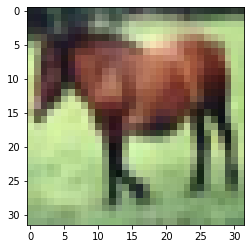

In [ ]:
plt.imshow(train_images[7], cmap=plt.cm.binary)

In [ ]:
train_images = (train_images.astype(np.float32) / 255.)
test_images = (test_images.astype(np.float32) / 255.)

train_labels = train_labels.astype(np.int32).reshape((-1,))
test_labels = test_labels.astype(np.int32).reshape((-1,))

train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels)) 


In [ ]:
train_data

<TensorSliceDataset shapes: ((32, 32, 3), ()), types: (tf.float32, tf.int32)>

In [ ]:
## Declare the sizes of batch, shuffle and repeat

SHUFFLE_SIZE = 10000
BATCH_SIZE = 128
REPEAT_TIMES = 3

In [ ]:
def batch_shuffle_repeat(data):


    #data = data.shuffle(SHUFFLE_SIZE, reshuffle_each_iteration= True)
    data = data.batch(BATCH_SIZE)    
    #data = data.repeat(REPEAT_TIMES)


    return data

In [ ]:
train_data = batch_shuffle_repeat(train_data)
train_data

<BatchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
test_data = test_data.shuffle(SHUFFLE_SIZE).batch(BATCH_SIZE)

In [ ]:
layers_config = [
          tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                                 input_shape=(32,32,3),
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.Conv2D(32,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.Conv2D(64,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.3),

          tf.keras.layers.Conv2D(128,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.Conv2D(128,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.4),

          tf.keras.layers.Conv2D(256,3,padding='same',activation='relu',
                                 kernel_initializer = tf.keras.initializers.RandomUniform(minval=-0.1, maxval=0.1, seed=None),
                                 use_bias = True,bias_initializer='zeros'),
          tf.keras.layers.MaxPool2D((2,2)),
          tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation='relu'),
          #tf.keras.layers.Dropout(0.25),

          tf.keras.layers.Dense(256,activation='relu'),
          tf.keras.layers.Dense(512,activation='relu'),
          #tf.keras.layers.Dense(1024,activation='relu'),
          tf.keras.layers.Dense(10)

]

In [ ]:
## Define the model
model = tf.keras.Sequential(layers_config)


In [ ]:
## Define the optimizers and the losses

## Optimizer defined
opt = tf.keras.optimizers.Adam(0.001)


## Loss function defined..  
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## Train accuracy metric
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
## Test Accuracy metric
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


In [ ]:
steps = 0

epochs = 100
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  for img_batch,lbl_batch in train_data:
      steps = steps+1
      #img_batch, lbl_batch = mnist_data.next_batch()
      with tf.GradientTape(persistent=True) as tape:
          logits = model(img_batch, training=True)  # Logits for this minibatch

          # Compute the loss value for this minibatch.
          loss_value = loss_fn(lbl_batch, logits)

      # Use the gradient tape to automatically retrieve
      # the gradients of the trainable variables with respect to the loss.
      grads = tape.gradient(loss_value, model.trainable_weights)

      # Run one step of gradient descent by updating
      # the value of the variables to minimize the loss.
      opt.apply_gradients(zip(grads, model.trainable_weights))

      train_acc_metric(lbl_batch, logits)
      
      if not steps % 100:
          # this is different from before. there, we only evaluated accuracy
          # for one batch. Now, we always average over 100 batches
          print("Loss: {} Accuracy: {}".format(loss_value, train_acc_metric.result()))
          train_acc_metric.reset_states()


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

In [ ]:
model = tf.keras.models.load_model('saved_model/my_model', compile= False)

> #### 4.1. Gradient-based Saliency map

Yes, the saliency maps make sense. The highlighted areas seems to be the one the model looks at to give the class output. Since it is looking at maybe the windshield of the truck, the tyres:the features of the image, it makes sense.

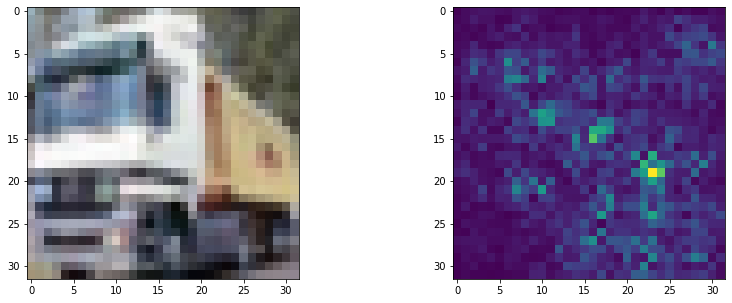

In [ ]:
for img, lbl in train_data.take(1):
  image = img[1]
  image = tf.expand_dims(image, axis=0)   #since taking a single image, adding the batch dimension
  label = lbl[1]
epochs = 1
for epoch in range(epochs): 

    with tf.GradientTape(persistent=True) as tape:

            tape.watch(image)
            logits = model(image)#, training=True)  
            soft_out = tf.nn.softmax(logits)[-1][-1]                  #taking softmax output of class truck
            loss_value = loss_fn(label, logits)
       
    
    grads = tape.gradient(soft_out, image)
    #sal = tf.squeeze(grads,0)
    sal = tf.math.abs(grads)           #taking the absolute 
    sal = np.max(sal, axis=3)[0]      #taking the maximum value, reduce the 3 channels to 1
    arr_min, arr_max  = np.min(sal), np.max(sal)
    sal = (sal - arr_min) / (arr_max - arr_min + 1e-18)

    fig, axes = plt.subplots(1,2,figsize=(14,5))    
    axes[0].imshow(tf.squeeze(image,0)) 
    axes[1].imshow(sal)  

> #### 4.2. Activation Maximization

1. FOr 100 epochs, the resulting input still looks natural.
2. For epochs>300 images start to blur out more and seems more like a combination of features than images.
3. When initialised with random noise instead of real examples, input simply appears to be patches of pixels hear and there, i.e. the image is only the features contributing for the prediction of that particular class.

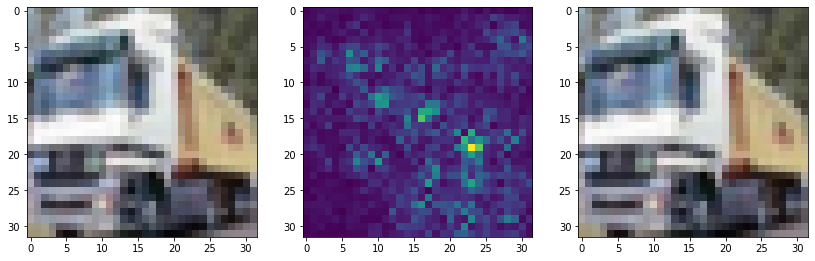

In [ ]:
for img, lbl in train_data.take(1):
  image = img[1]
  image = tf.expand_dims(image, axis=0)   #since taking a single image, adding the batch dimension
  label = lbl[1]
epochs = 100
for epoch in range(epochs): 

    with tf.GradientTape(persistent=True) as tape:
            tape.watch(image)
            logits = model(image)#, training=True)  
            soft_out = tf.nn.softmax(logits)[-1][-1]                   #taking softmax output of class truck
            loss_value = loss_fn(label, logits)
       
    
    grads = tape.gradient(soft_out, image)
    #sal = tf.squeeze(grads,0)
    sal = tf.math.abs(grads)           #taking the absolute 
    sal = np.max(sal, axis=3)[0]      #taking the maximum value, reduce the 3 channels to 1
    arr_min, arr_max  = np.min(sal), np.max(sal)
    sal = (sal - arr_min) / (arr_max - arr_min + 1e-18)
    
    #sal = tf.clip_by_value(grads,0,1)
    # arr_min1, arr_max1  = np.min(grads), np.max(grads)
    # sal1 = (grads - arr_min) / (arr_max - arr_min + 1e-18)
    #print(sal.shape)   
   
    grads = tf.math.scalar_mul(0.1,grads)      
    upd_image = tf.math.add(image, grads)  

    #printing the orignal image and saliency map  
    
    if not epoch % 100:         
      fig, axes = plt.subplots(1,3,figsize=(14,5))    
      axes[0].imshow(tf.squeeze(image,0)) 
      axes[1].imshow(sal)          
      axes[2].imshow(tf.squeeze(upd_image,0))      
    
    image = upd_image   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

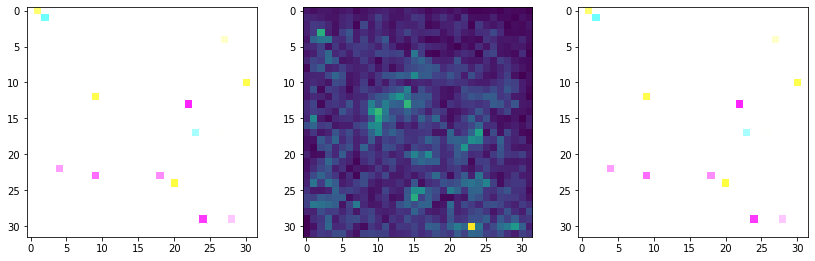

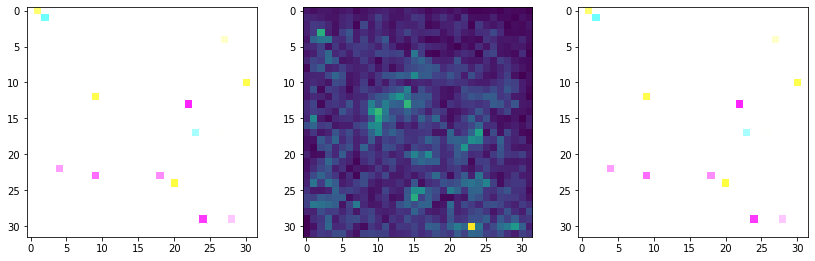

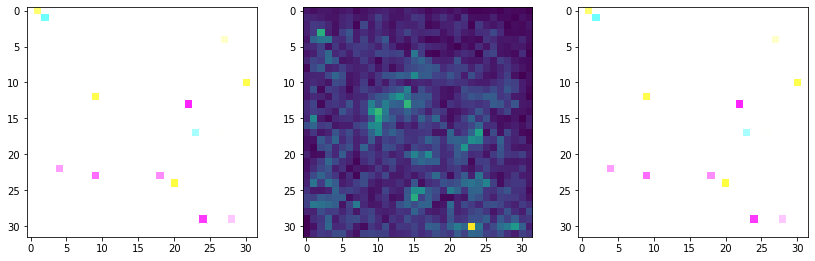

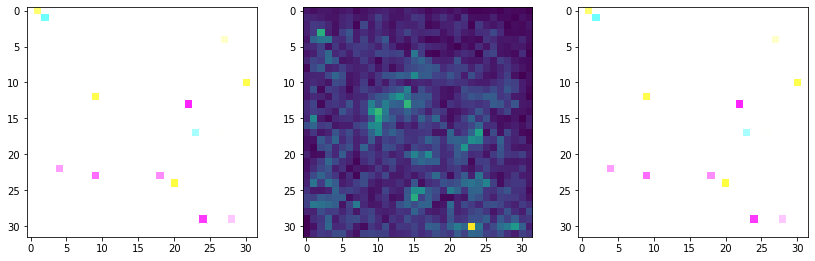

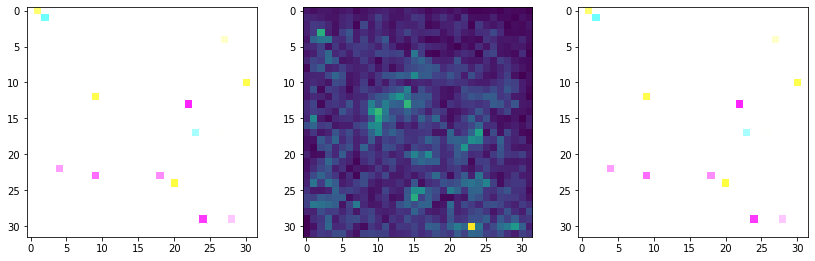

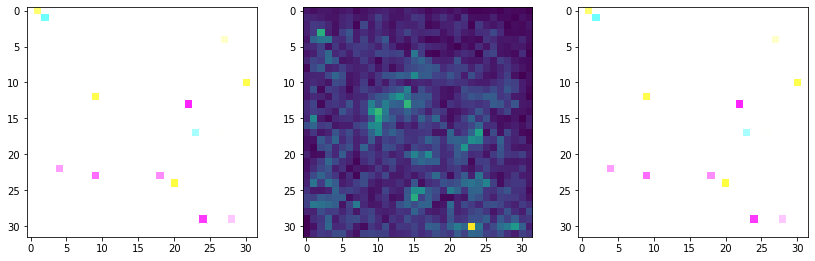

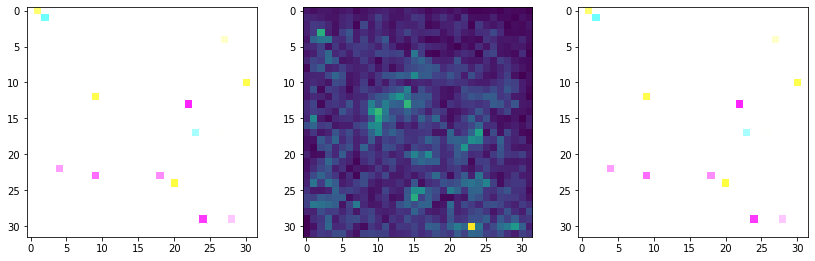

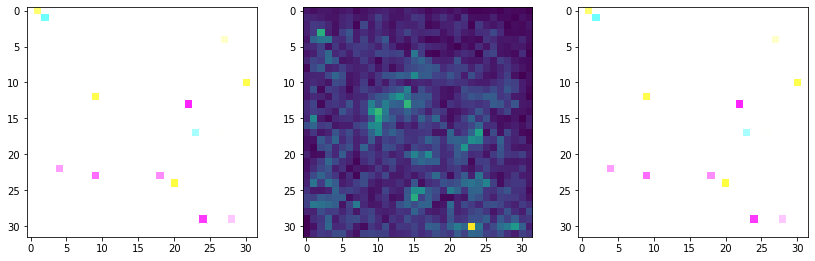

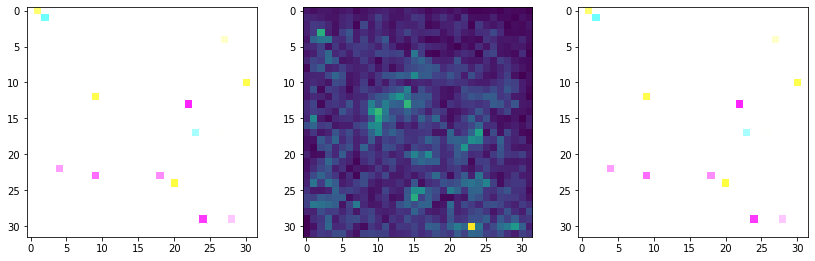

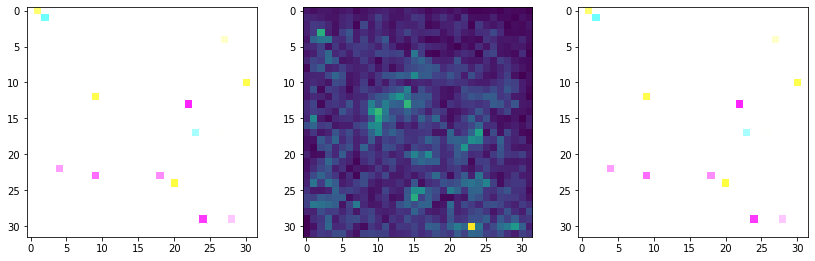

In [ ]:
image = tf.Variable(tf.random.uniform(shape=[32,32,3],minval=0 , maxval= 256))
image = tf.expand_dims(image, axis=0)   #since taking a single image, adding the batch dimension
label = lbl[1]
epochs = 1000
for epoch in range(epochs): 

  with tf.GradientTape(persistent=True) as tape:

          tape.watch(image)
          logits = model(image)#, training=True)  
          soft_out = tf.nn.softmax(logits)[-1][-1]                   #taking softmax output of class truck

          # Compute the loss value for this minibatch.
          loss_value = loss_fn(label, logits)
      
  
  grads = tape.gradient(soft_out, image)
  sal = tf.math.abs(grads)                                          #taking the absolute 
  sal = np.max(sal, axis=3)[0]                                      #taking the maximum value, reduce the 3 channels to 1
  arr_min, arr_max  = np.min(sal), np.max(sal)
  sal = (sal - arr_min) / (arr_max - arr_min + 1e-18)
  grads = tf.math.scalar_mul(0.1,grads) 
  upd_image = tf.math.add(image, grads)  

  #printing the orignal image and saliency map  
  
  if not epoch % 100:         
    fig, axes = plt.subplots(1,3,figsize=(14,5))    
    axes[0].imshow(tf.squeeze(image,0)) 
    axes[1].imshow(sal)          
    axes[2].imshow(tf.squeeze(upd_image,0))

  image = upd_image    


#### 5.0  NTM

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/hin-eng.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/NTM")

In [ ]:
#removing unwanted strings

a = "Wow!	वाह!	CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #6179147 (fastrizwaan)"
a = a.split('CC-BY 2.0')[0]
print(a)

Wow!	वाह!	


In [ ]:
#creating the file of format english-hindi and removing following unwanted strings

with open('/content/drive/My Drive/Colab Notebooks/NTM/hin.txt', 'r') as f:  
  a = f.readlines()
  #print(a[2113])
  with open('/content/drive/My Drive/Colab Notebooks/NTM/hin_edited.txt', 'w') as fe:
    for i in range(len(a)):
      fe.write(a[i].split('CC-BY 2.0')[0])
      fe.write("\n")


In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/NTM/hin_edited.txt") as f:
  a = f.read()
  print(a[:1000])

Wow!	वाह!	
Help!	बचाओ!	
Jump.	उछलो.	
Jump.	कूदो.	
Jump.	छलांग.	
Hello!	नमस्ते।	
Hello!	नमस्कार।	
Cheers!	वाह-वाह!	
Cheers!	चियर्स!	
Got it?	समझे कि नहीं?	
I'm OK.	मैं ठीक हूँ।	
Awesome!	बहुत बढ़िया!	
Come in.	अंदर आ जाओ।	
Get out!	बाहर निकल जाओ!	
Go away!	चले जाओ!	
Goodbye!	ख़ुदा हाफ़िज़।	
Perfect!	उत्तम!	
Perfect!	सही!	
Welcome.	आपका स्वागत है।	
Welcome.	स्वागतम्।	
Have fun.	मज़े करना।	
Have fun.	मौज करना।	
Have fun.	मज़े करो।	
I forgot.	मैं भूल गया।	
I forgot.	मैं भूल गई।	
I'll pay.	मैं पैसे दूंगा।	
I'm fine.	मैं ठीक हूँ।	
I'm full.	मेरा पेट भर गया है।	
Let's go!	चलो चलें!	
Answer me.	मुझे जवाब दो।	
Birds fly.	पंछी उड़ते हैं।	
Excuse me.	माफ़ कीजिए।	
Fantastic!	बहुत ख़ूब!	
I fainted.	मैं बेहोश हो गया।	
I fear so.	खेद की बात है, लेकिन वैसा ही है।	
I laughed.	मैं हँसा।	
I'm bored.	मैं बोर हो रहा हूँ।	
I'm broke.	मेरा दीवालिया हो चुका है।	
I'm tired.	मैं थक गया हूँ।	
It's cold.	ठंड हो रही है।	
Well done!	शाबाश!	
Who knows?	कौन जाने?	
Who knows?	किसको पता है?	
Who knows?	किसे पता है?	
Wh

In [ ]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
  
  # w = unicode_to_ascii(w.lower().strip())       #convert everything to lowercase,remove white spaces in beginning and end and then unicode to asccii becasue it's easier with less numbers
  # print(w)
  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿।])", r" \1 ", w)
  
  w = re.sub(r'[" "]+', " ", w)

  
  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^\u0900-\u097Fa-zA-Z?.!,¿।]+", " ", w)                                      #^ indicates negation

  
  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w


In [ ]:
en_sentence = u"May I borrow this book?"
hin_sentence = u"मैं थक गया हूँ।"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(hin_sentence))

<start> May I borrow this book ? <end>
<start> मैं थक गया हूँ । <end>


In [ ]:
# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, SPANISH]
def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')   #return a list of words with each new line in dataset as one element in the list, therfore each element of list is "englishword\tspanish word"
  #print(lines[:10])

  word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]    #takes each element as splits into two english,spanish
  #print(word_pairs[:10])
  return zip(*word_pairs)

In [ ]:
en, hin = create_dataset("/content/drive/My Drive/Colab Notebooks/NTM/hin_edited.txt", None)
print(en[-1])
print(hin[-1])

<start> When I was a kid , touching bugs didn t bother me a bit . Now I can hardly stand looking at pictures of them . <end>
<start> जब मैं बच्चा था , मुझे कीड़ों को छूने से कोई परेशानी नहीं होती थी , पर अब मैं उनकी तस्वीरें देखना भी बर्दाश्त नहीं कर सकता । <end>


In [ ]:
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(                 #treats each string as a token which is default because this function takes a char_level argument if we want to consider each character as token
      filters='')                                                         #takes another arument oov token, in case out of vocabulary words are present, they will be replaced by this
  lang_tokenizer.fit_on_texts(lang)                                       #considers each entry of list as a token          

  tensor = lang_tokenizer.texts_to_sequences(lang)                        #converts strings into sequence of integers

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')  #to make sequences of equal length,pads at the end of the sequence

  return tensor, lang_tokenizer

In [ ]:
def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = create_dataset(path, num_examples)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
# Try experimenting with the size of that dataset
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset("/content/drive/My Drive/Colab Notebooks/NTM/hin_edited.txt", num_examples)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [ ]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

2218 2218 555 555


In [ ]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [ ]:
#same words of different language are not mapped to the same index, this print proves it.

print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

Input Language; index to word mapping
1 ----> <start>
29 ----> मेरे
189 ----> पिता
386 ----> शायद
365 ----> सो
97 ----> रहे
327 ----> होंगे
3 ----> ।
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
16 ----> my
70 ----> father
139 ----> may
43 ----> be
762 ----> sleeping
3 ----> .
2 ----> <end>


In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 30]), TensorShape([64, 28]))

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 30, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


> #### BahdanauAttention

In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    #print((tf.nn.tanh(self.W1(query_with_time_axis) + self.W2(values))).shape)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))
    
    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 30, 1)


In [ ]:
#example to undertsand how dot and luong attention works.

encoder_states = tf.Variable([[[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4],[5,5,5,5]],[[5,5,5,5],[6,6,6,6],[7,7,7,7],[8,8,8,8],[9,9,9,9]],[[9,9,9,9],[10,10,10,10],[11,11,11,11],[12,12,12,12],[13,13,13,13]]] ,dtype= tf.float32)
decoder_state = tf.Variable(tf.ones((3,4)), dtype= tf.float32)
decoder_state = tf.expand_dims(decoder_state,1)
print(encoder_states.shape)
print(decoder_state.shape)
print(tf.multiply(decoder_state,encoder_states).shape)
print((tf.reduce_sum( tf.multiply(decoder_state,encoder_states), 2)))

(3, 5, 4)
(3, 1, 4)
(3, 5, 4)
tf.Tensor(
[[ 4.  8. 12. 16. 20.]
 [20. 24. 28. 32. 36.]
 [36. 40. 44. 48. 52.]], shape=(3, 5), dtype=float32)


> #### Dot Product Attention

In [ ]:
class dotProductAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(dotProductAttention, self).__init__()
    # self.W1 = tf.keras.layers.Dense(units)
    # self.W2 = tf.keras.layers.Dense(units)
    # self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units) 
    
    
    score = tf.reduce_sum( tf.multiply(query_with_time_axis,values), 2)
    score = tf.expand_dims(score,2)
    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = dotProductAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 30, 1)


> #### Luong's Multiplicative Attention

In [ ]:
class LuongAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(LuongAttention, self).__init__()
    #self.W1 = tf.keras.layers.Dense(units)
    # self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(max_length_inp)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units) 
    
    
    score = self.V(tf.reduce_sum( tf.multiply(query_with_time_axis,values), 2))
    # W = tf.keras.layers.Dense(score.shape[1])
    # score = W(score)
    #print(score.shape)
    score = tf.expand_dims(score,2)
    
    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = LuongAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 30, 1)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = LuongAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 2318)


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
#The encoder output, encoder hidden state and the decoder input (which is the start token) is passed to the decoder.

@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 50

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  
  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.0438
Epoch 1 Loss 0.0416
Time taken for 1 epoch 4.771111965179443 sec

Epoch 2 Batch 0 Loss 0.0355
Epoch 2 Loss 0.0380
Time taken for 1 epoch 4.697563171386719 sec

Epoch 3 Batch 0 Loss 0.0321
Epoch 3 Loss 0.0357
Time taken for 1 epoch 4.744590997695923 sec

Epoch 4 Batch 0 Loss 0.0188
Epoch 4 Loss 0.0332
Time taken for 1 epoch 4.7708234786987305 sec

Epoch 5 Batch 0 Loss 0.0348
Epoch 5 Loss 0.0361
Time taken for 1 epoch 4.772021532058716 sec

Epoch 6 Batch 0 Loss 0.0302
Epoch 6 Loss 0.0359
Time taken for 1 epoch 4.766761779785156 sec

Epoch 7 Batch 0 Loss 0.0334
Epoch 7 Loss 0.0340
Time taken for 1 epoch 4.784346103668213 sec

Epoch 8 Batch 0 Loss 0.0258
Epoch 8 Loss 0.0352
Time taken for 1 epoch 4.7783520221710205 sec

Epoch 9 Batch 0 Loss 0.0311
Epoch 9 Loss 0.0308
Time taken for 1 epoch 4.7533063888549805 sec

Epoch 10 Batch 0 Loss 0.0218
Epoch 10 Loss 0.0280
Time taken for 1 epoch 4.765687942504883 sec

Epoch 11 Batch 0 Loss 0.0162
Epoch 11 Loss 0.0261
Time 

In [ ]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis', clim=[0,1])

  fontdict = {'fontsize': 14, 'fontfamily':'lohit-devanagari'}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

> #### Results

1. Each word is used as a token.
2. No, same words of different language are not mapped to the same index.
3. Since, for the very first input, there is no decoder hidden state, we use the encoder hidden state as first decoder hidden state
4. The decoder at the current time step, attends to the previous inputs according to the attention mechanism and also, takes an input from the previous time step of the decoder. Also, since there are hidden connections in the decoder, all the information from previous outputs of decoder is encoded.
5. The encoder gives the same output for a given input sentence but since the decoder attends to the encoder hiddden states according to the attention weights, the context vector changes according to attention weights.
6. The decoder does use teacher forcing, however due to recurrent connections between hidden units, parallel computation is not possible.
7. Because of the presence of the variable length input, we need to mask out invalid values in the loss.

**Observations**

1. For Bahdanau's attention, the model seems to attend the correct tokens in the input language and to some extent for dot product attention as well. However, for luong's attention, there seems to be a problem, the sentences start repeating. Maybe the way i have implemented it might be incorrect or maybe it requires more amount of training.
2. Because of the above reason, I do see qualitative difference in the attention weights.



Translated using Bahdanau Attention

Input: <start> आप का नाम क्या है ? <end>
Predicted translation: what is your name ? <end> 


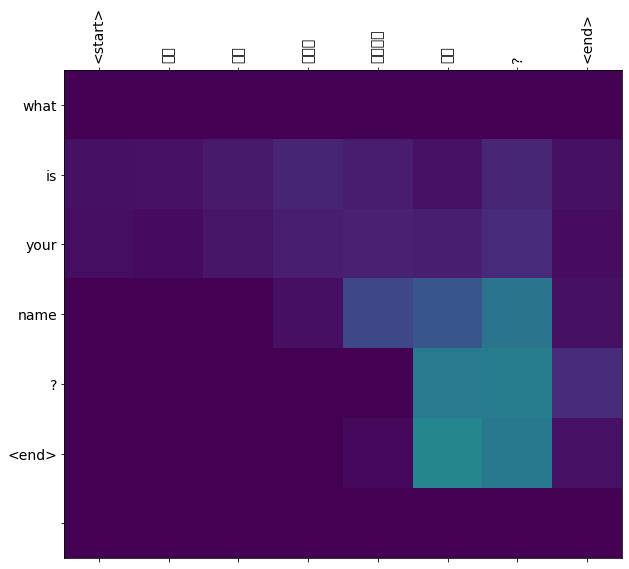

In [ ]:
translate(u'आप का नाम क्या है?')

Translated using Dot product Attention

Input: <start> आप का नाम क्या है ? <end>
Predicted translation: what do you know this ? <end> 


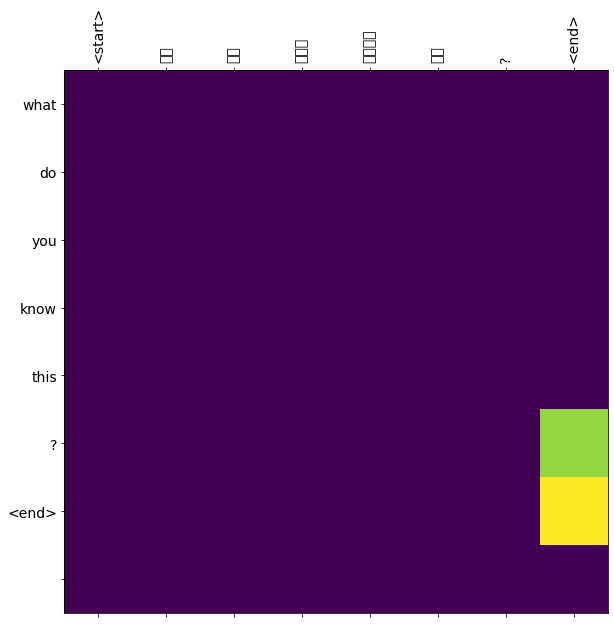

In [ ]:
translate(u'आप का नाम क्या है?')

Translated using Luong's Multiplicative Attention

Input: <start> आप का नाम क्या है ? <end>
Predicted translation: what do you do you do you do you do you do you do you do you do you do you do you do you do you do 


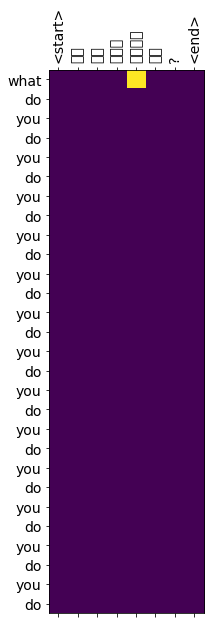

In [ ]:
translate(u'आप का नाम क्या है?')

# 7.0 What did you learn: Manish Bhandari Vipinraj Bhandari

I did task 4: Introspection and task 5: NTM

1. Gradient based saliency map showed the expected results and so did Bahdanau's attention. I'd expected saliency maps to hightlight the important areas and attention weights to attend proper token and it worked as expected.
2. I expected luong's multiplicative attention to work on similar lines with Bahdanau's attention with same amount of training. However, the former requires more amount of training to give proper results which was bit suprising.
Also, it was interesting to see how a random image can be optimised to correspond to a particular class in introspection task.
3. Both the tasks were moderately easy give the instructions and the tensorflow tutorials.
4. I think, somehow, my implementation of dot product and Luong's attention is not entirely correct. Mathematically, they seem to be correct and I've implemented them according to what was available in slides and online but it doesn't give the same results as Bahdanau. Maybe a heads up regarding that would have be helpful.